In [7]:
from joblib import load
print "Trained a KNeighborsClassifier with the number of neighbors set to 5."
kn_clf = load("../models/kneighbors.joblib")
print kn_clf

Trained a KNeighborsClassifier with the number of neighbors set to 5.
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [12]:
import pandas as pd
movies = pd.read_csv('../data/processed/movies.csv')
print "Use KNeighbors model to generate 5 movies as neighbors for recommendation."
print "Similar movies to movie 'Broken Hearts Club. The (2000)'"
test_set = pd.read_csv("../data/processed/test_set.csv")
indices = kn_clf.kneighbors(X=[test_set.as_matrix()[0]], n_neighbors=5, return_distance=False)
recommended_movies = []
for r in indices:
    recommended_movies.append(movies.iloc[r].title)
print "recommended movies by KNeighborsClassifier:\n{}".format(recommended_movies)

Use KNeighbors model to generate 5 movies as neighbors for recommendation.
Similar movies to movie 'Broken Hearts Club. The (2000)'
recommended movies by KNeighborsClassifier:
[2689          Better Than Chocolate (1999)
3152    Kestrel's Eye (Falkens öga) (1998)
6826      In My Skin (Dans ma Peau) (2002)
6151             Piglet's Big Movie (2003)
6672     Song Remains the Same. The (1976)
Name: title, dtype: object]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
print "Similar movies to movie 'History Boys. The (2006)'"
indices = kn_clf.kneighbors(X=[test_set.as_matrix()[498]], n_neighbors=5, return_distance=False)
recommended_movies = []
for r in indices:
    recommended_movies.append(movies.iloc[r].title)
print "recommended movies by KNeighborsClassifier:\n{}".format(recommended_movies)

Similar movies to movie 'History Boys. The (2006)'
recommended movies by KNeighborsClassifier:
[2689          Better Than Chocolate (1999)
3152    Kestrel's Eye (Falkens öga) (1998)
6826      In My Skin (Dans ma Peau) (2002)
6151             Piglet's Big Movie (2003)
6672     Song Remains the Same. The (1976)
Name: title, dtype: object]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Plot Silhouette score chart for different number of clusters.


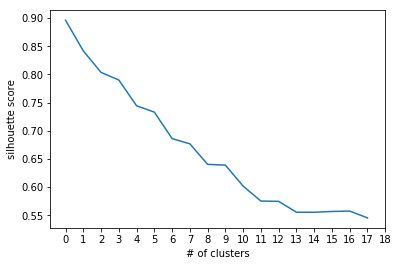

In [13]:
print "Plot Silhouette score chart for different number of clusters."
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
columns_to_drop = ["movie_id", "title", "genres"]
movies.drop(columns=columns_to_drop, inplace=True, axis=1)

silhouette_scores = []
from sklearn.metrics import silhouette_score
for i in range(20)[2:]:
    km = KMeans(n_clusters=i)
    km.fit_predict(movies)
    silhouette_scores.append(silhouette_score(movies, km.labels_))
plt.plot(silhouette_scores)
plt.xticks(range(0, 19))
plt.xlabel("# of clusters")
plt.ylabel("silhouette score")
plt.show()